# **Project Overview**

This project analyzes historical Olympic Games data from 1896 to 2016, exploring athlete demographics, performance metrics, and medal distributions. The analysis provides insights into participation trends, athlete physical characteristics, and competitive outcomes across different sports, countries, and time periods.

# **Importing All Libraries**

In [168]:
import pandas as pd # Library for data analysis and working with DataFrames
import numpy as np # Library for numerical computations and arrays


import matplotlib.pyplot as plt   # Library for creating visualizations and plots
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns             # Library for advanced statistical data visualization (built on matplotlib)

import warnings                           # Library to handle warning messages
warnings.filterwarnings('ignore')         # Ignores warning messages to keep the output clean

# **Defining color plate**

In [169]:
# Define a custom colormap:
# - For seaborn: create a LinearSegmentedColormap from 4 hex colors
# - For matplotlib: use a simple list of hex colors directly
my_cmap = LinearSegmentedColormap.from_list("my_cmap", ["#193a6b", "#fcd9eb","#2b1402","#f56ca9"]) #seaborn
hex_color = ["#f56ca9", "#193a6b", "#fcd9eb"] # matplot

# **Reading Data**

In [170]:
# Read data from a CSV file into a DataFrame
data = pd.read_csv('/content/drive/MyDrive/athlete_events.csv')

# **Data Cleaning**

In [171]:
# Convert the 'ID' column to object type (categorical/text data)
data['ID'] = data['ID'].astype('object')

# Convert the 'Year' column to object type (categorical/text data)
data['Year'] = data['Year'].astype('object')

# **Scanning the data**

In [172]:
# Print the shape of the dataset (rows, columns)
print(data.shape)

# Display the first 5 rows of the dataset to get an initial overview
data.head()

(271116, 15)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [173]:
# Display concise summary of the DataFrame, including:
# - Column names
# - Number of non-null (non-missing) values in each column
# - Data type of each column
# - Memory usage of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  object 
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  object 
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), object(12)
memory usage: 31.0+ MB


In [174]:
#to exctract insights from the data
data.describe()
#there is outlier in Age column 97!!
#there is outliers in weight 214 & hieght 226!!

,Age,Height,Weight
count,261642.000000,210945.000000,208241.000000
mean,25.556898,175.338970,70.702393
std,6.393561,10.518462,14.348020
min,10.000000,127.000000,25.000000
25%,21.000000,168.000000,60.000000
50%,24.000000,175.000000,70.000000
75%,28.000000,183.000000,79.000000
max,97.000000,226.000000,214.000000


In [175]:
#Shows count of non-missing values, number of unique categories, most frequent category (top), and its frequency (freq).
data.describe(include='O')
#the ID appears more frequently than the Name, indicating IDs are unique or repeated consistently, while Name has more variability.

,ID,Name,Sex,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
count,271116,271116,271116,271116,271116,271116,271116,271116,271116,271116,271116,39783
unique,135571,134732,2,1184,230,51,35,2,42,66,765,3
top,77710,Robert Tait McKenzie,M,United States,USA,2000 Summer,1992,Summer,London,Athletics,Football Men's Football,Gold
freq,58,58,196594,17847,18853,13821,16413,222552,22426,38624,5733,13372


# **Target (Medal)**

In [176]:
# Counts of each Medal type including missing values.
# Helps identify how many athletes won medals versus how many have no medal recorded (NaN).
data['Medal'].value_counts(dropna='False')

,count
Medal,
Gold,13372
Bronze,13295
Silver,13116


In [177]:
# Calculates the proportion of missing values in the 'Medal' column.
# Indicates the percentage of athletes who did not win a medal or whose medal info is not recorded.

data['Medal'].isna().sum() / len(data)

np.float64(0.853262072323286)

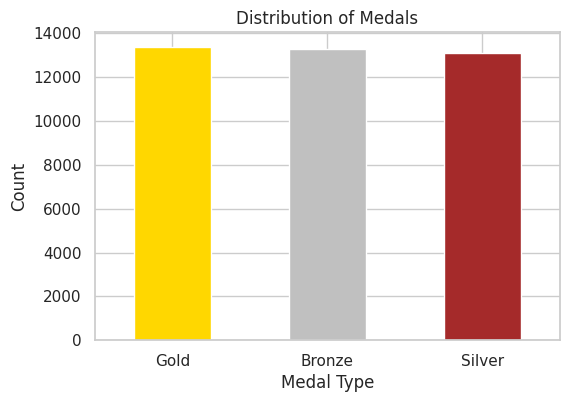

In [178]:
# Create a bar chart to visualize the distribution of medals
plt.figure(figsize=(6, 4))

# Plot counts of each medal type with colors representing the medal
data['Medal'].value_counts().plot(
    kind='bar',
    color=['gold', 'silver', 'brown']  # Gold, Silver, Bronze
)

# Add chart title and axis labels
plt.title('Distribution of Medals')
plt.xlabel('Medal Type')
plt.ylabel('Count')

# Keep x-axis labels horizontal for readability
plt.xticks(rotation=0)

# Display the plot
plt.show()

# Comment:
# This bar chart shows how many athletes won each type of medal.
# It helps to quickly see which medal is most common and the overall medal distribution.

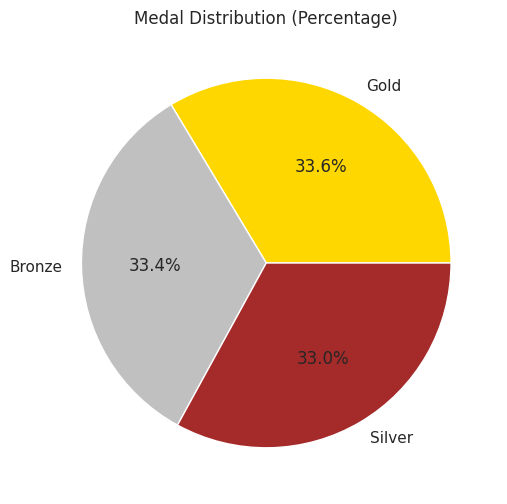

In [179]:
# Create a pie chart to visualize the percentage distribution of medals
plt.figure(figsize=(6, 6))

# Plot normalized counts of each medal type as percentages
data['Medal'].value_counts(normalize=True).plot(
    kind='pie',
    autopct='%1.1f%%',             # Show percentage on each slice
    colors=['gold', 'silver', 'brown']  # Gold, Silver, Bronze
)

# Add chart title and remove y-axis label for cleaner look
plt.title('Medal Distribution (Percentage)')
plt.ylabel('')

# Display the plot
plt.show()

# Comment:
# This pie chart shows the proportion of athletes who won each type of medal.
# It clearly visualizes the percentage share of Gold, Silver, and Bronze medals.

# Split the dataset into numerical and categorical columns

In [180]:
# Split the dataset into numerical and categorical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

In [181]:
# Display the columns
print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

# numerical_cols contains all columns with numeric data types (int or float)
# categorical_cols contains all columns with object or category data types
# This is useful for applying different preprocessing steps to each type.

Numerical Columns: Index(['Age', 'Height', 'Weight'], dtype='object')
Categorical Columns: Index(['ID', 'Name', 'Sex', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City',
       'Sport', 'Event', 'Medal'],
      dtype='object')


# **Handle Missing Data**

In [182]:
# Missing data in numerical columns
numerical_missing = data[numerical_cols].isna().sum()
print("Missing values in numerical columns:\n", numerical_missing)

Missing values in numerical columns:
 Age        9474
Height    60171
Weight    62875
dtype: int64


In [183]:
# Missing data in categorical columns
categorical_missing = data[categorical_cols].isna().sum()
print("\nMissing values in categorical columns:\n", categorical_missing)


Missing values in categorical columns:
 ID             0
Name           0
Sex            0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


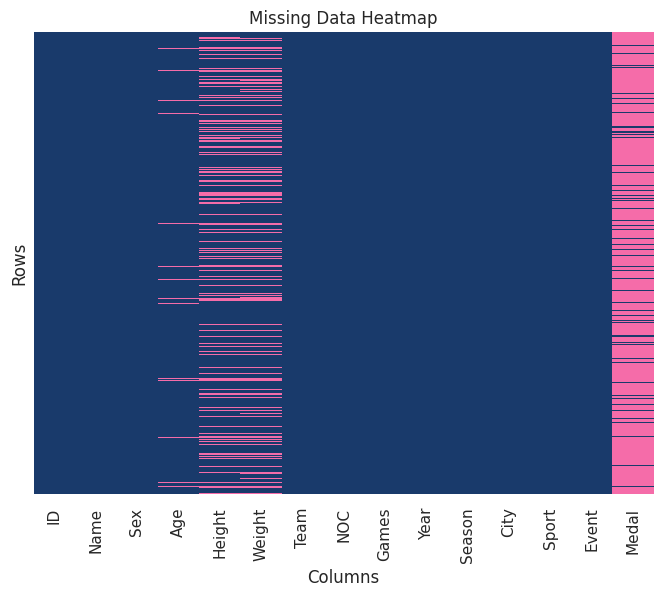

In [184]:
# This heatmap visualizes missing values in the dataset.
# Each column represents a feature, and each row represents a record.

plt.figure(figsize=(8, 6))
missing_data = data.isnull()

sns.heatmap(
    missing_data,
    cmap= my_cmap,
    cbar=False,
    yticklabels=False,
    xticklabels=data.columns,
    annot=False
)

plt.title('Missing Data Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

The missing data heatmap reveals that most columns in the dataset are complete, with no missing values, while the missingness is concentrated in a few specific variables. The columns **Age, Height, and Weight** show scattered missing values across different rows, which could impact any analysis involving demographic or physical characteristics of athletes. The **Medal** column, on the other hand, contains the highest proportion of missing values, which is expected since most athletes do not win medals. Overall, the dataset is largely complete except for these variables.

In [185]:
# Calculate the average Height and Weight by Sex, converting results to integers
# This helps compare average physical attributes between male and female athletes to fill missing data by mean
data.groupby('Sex')[['Height', 'Weight']].mean().astype(int)

,Height,Weight
Sex,,
F,167,60
M,178,75


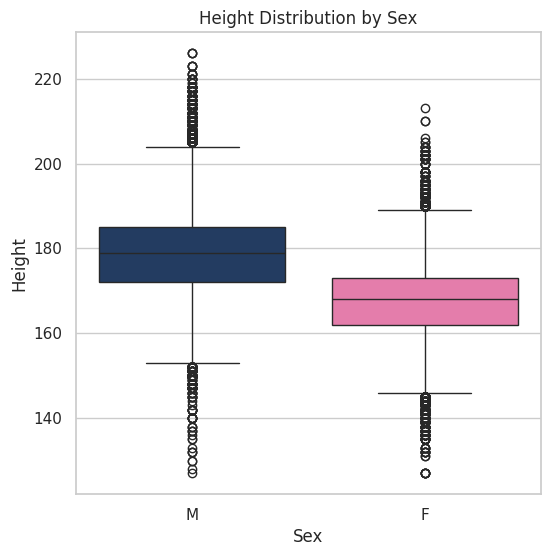

In [186]:
# Boxplot showing the distribution of Height by Sex.
# The plot highlights median, quartiles, and potential outliers in Height for each sex.
# Convert to a discrete list of 2 colors (for Sex: Male, Female)
colors = [my_cmap(0.0), my_cmap(1.0)]  # pick start and end colors
plt.figure(figsize=(6, 6))
sns.boxplot(x='Sex', y='Height', data=data, palette =colors)
plt.title('Height Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Height')
plt.show()

The boxplot of height distribution by sex shows that male athletes are generally taller than female athletes, with a median height of around 180 cm compared to about 168 cm for females. Male heights also display greater variability, as indicated by a wider interquartile range, while female heights are more tightly clustered around the median. Both groups include outliers, with very tall athletes (exceeding 210–220 cm). Overall, the distribution highlights a clear upward shift in male athlete height compared to females, while still showing areas of overlap between the two groups.


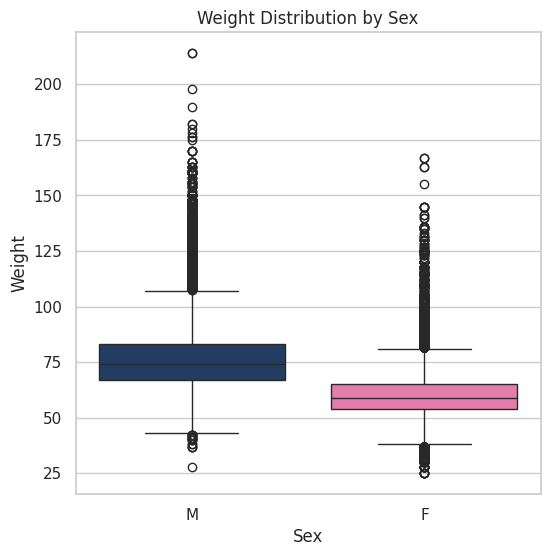

In [187]:
# Boxplot showing the distribution of Weight by Sex.
# The plot highlights median, interquartile range, and potential outliers in Weight for each sex.
colors = [my_cmap(0.0), my_cmap(1.0)]  # pick start and end colors
plt.figure(figsize=(6, 6))
sns.boxplot(x='Sex', y='Weight', data=data, palette=colors)
plt.title('Weight Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Weight')
plt.show()

The boxplot of weight distribution by sex shows that male athletes generally weigh more than female athletes, with a median weight of about 75 kg for males compared to around 60 kg for females. Male athletes also exhibit a broader spread in weight, as reflected by the wider interquartile range and the presence of many high-value outliers, some exceeding 200 kg. Female athletes, while generally lighter, also display a noticeable number of higher-weight outliers, though less extreme than those of males. Both groups have low-weight outliers, which may represent athletes in sports favoring smaller body size, such as gymnastics or long-distance running. Overall, the distribution highlights clear differences in typical weight ranges between male and female athletes, with greater variability and more extreme cases observed among males.


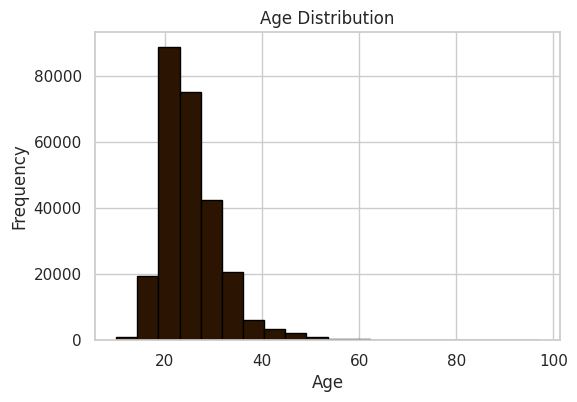

In [188]:
# Histogram showing the distribution of Age in the dataset.
plt.figure(figsize=(6, 4))
data['Age'].dropna().hist(bins=20, color='#2b1402', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



The histogram shows a clear **right-skewed distribution** of athlete ages. This indicates that the majority of athletes are young, with a large concentration in the **early to mid-20s**, which represents the most frequent age range. The frequency of athletes decreases sharply as age increases, forming a long tail that extends to older ages. While the data includes athletes as old as 90+, they are very rare. The overall pattern reveals that Olympic participation is overwhelmingly dominated by individuals in their youth, with a diminishing number of competitors in older age brackets.

# **Numerical Features**

In [189]:
# Print the number of numerical variables and show the first 5 rows of those variables
print(len(numerical_cols))
data[numerical_cols].head()


3


,Age,Height,Weight
0,24.0,180.0,80.0
1,23.0,170.0,60.0
2,24.0,NaN,NaN
3,34.0,NaN,NaN
4,21.0,185.0,82.0


Split the data to Discrete & Contiuous Features

# **Discrete Features**

In [190]:
# Select discrete numerical columns (with less than 20 unique values),
# print how many there are, and display the first 5 rows of those columns

discrete_cols=[var for var in numerical_cols if len(data[var].unique())<20]
print(len(discrete_cols))
data[discrete_cols].head()

0


""
0
1
2
3
4


# **Contiuous Features**

In [191]:
# Select continuous numerical columns (those not classified as discrete),
# print how many there are, and show the first 5 rows
continuouse_cols=[var for var in numerical_cols if var not in discrete_cols]
print(len(continuouse_cols))
data[continuouse_cols].head()

3


,Age,Height,Weight
0,24.0,180.0,80.0
1,23.0,170.0,60.0
2,24.0,NaN,NaN
3,34.0,NaN,NaN
4,21.0,185.0,82.0


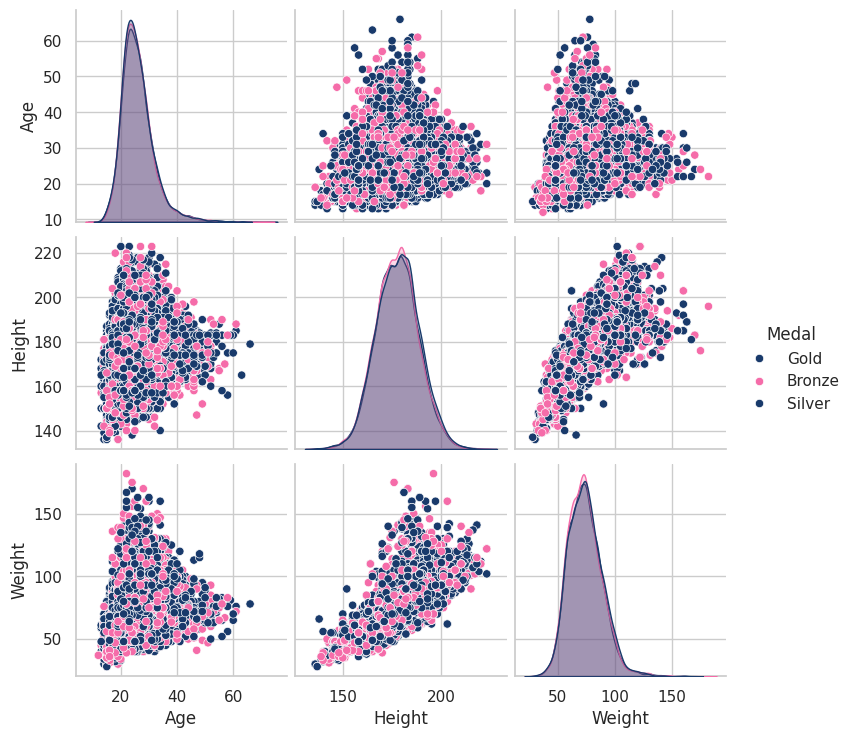

In [192]:
# Create pairwise scatterplots for the continuous variables with 'Medal' as hue.
# This helps visualize relationships between features and how they vary across different medal categories.
sns.pairplot(
    data[continuouse_cols + ['Medal']],
    hue='Medal',
    palette=colors # change color palette
);

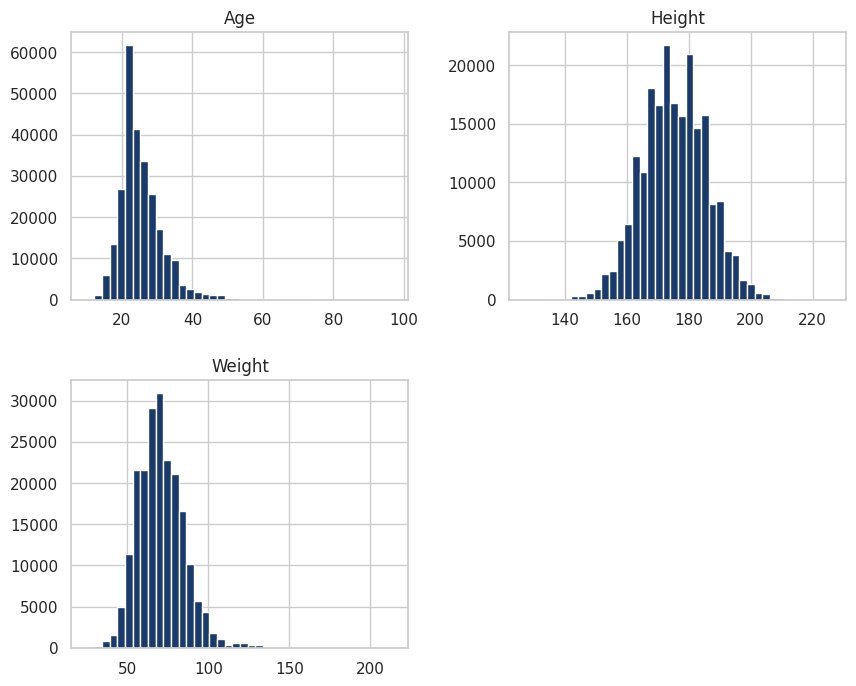

In [193]:
# Plot histograms for all continuous variables to observe their distributions.
# Using 40 bins for more granularity and a larger figure size for better visibility.
data[continuouse_cols].hist(
    bins=40,
    figsize=(10, 8),
    color='#193a6b'   # custom color for all histograms
);


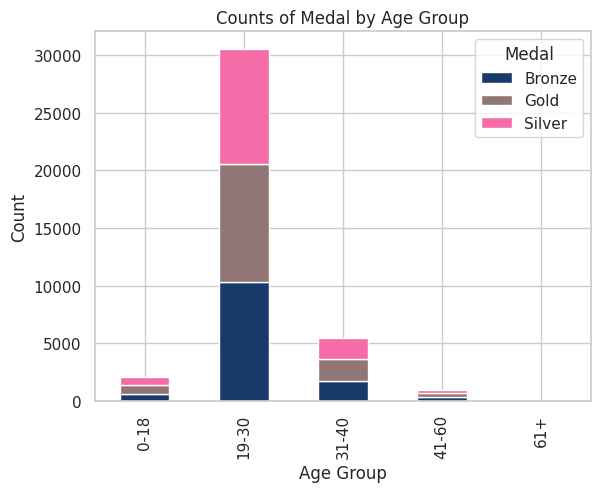

In [194]:
# Create a copy of Age and Medal columns
age_medal = data[['Age','Medal']].copy()

# Define bins and labels for Age groups
age_bins = [0,18,30,40,60,100]
age_labels = ['0-18','19-30','31-40','41-60','61+']

# Create a new categorical column Age_Group by binning Age
age_medal['Age_Group'] = pd.cut(
    age_medal['Age'],
    bins=age_bins,
    labels=age_labels,
    include_lowest=True
)

# Create a crosstab of Age_Group vs Medal
ct_age_medal = pd.crosstab(age_medal['Age_Group'], age_medal['Medal'])

# Plot stacked bar chart
ct_age_medal.plot(
    kind='bar',
    stacked=True,
    colormap= my_cmap  # optional: add color palette
)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Counts of Medal by Age Group')
plt.show()


From the chart we could discover that, the most significant discovery is that young adults aged 19-30 are overwhelmingly the most successful age group in winning Olympic medals, significantly outperforming all other cohorts. This group accounts for the vast majority of medals won, with their count dwarfing the totals for the 41-60 and 61+ age groups combined. Furthermore, across all age groups, the distribution of Gold, Silver, and Bronze medals appears relatively even, suggesting that while age is a major factor in the quantity of medals won, it does not drastically affect the type of medal (i.e., placement) achieved.

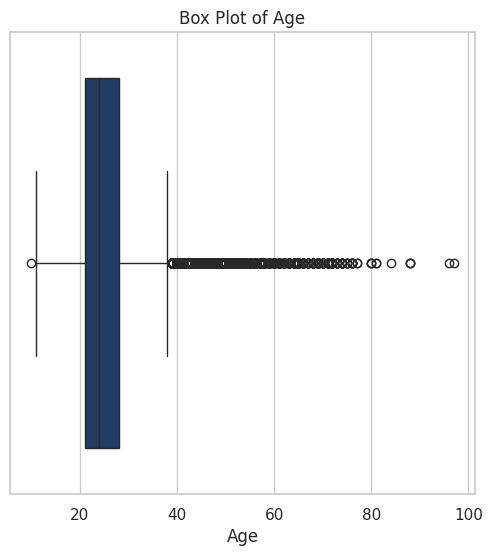

Number of people with age >= 70: 129
         Age  Height  Weight
2392    71.0     NaN     NaN
7433    75.0     NaN     NaN
9371    84.0     NaN     NaN
11011   72.0     NaN     NaN
11012   72.0     NaN     NaN
...      ...     ...     ...
253306  72.0     NaN     NaN
254475  72.0     NaN     NaN
254476  72.0     NaN     NaN
257054  97.0     NaN     NaN
260799  72.0     NaN     NaN

[129 rows x 3 columns]


In [195]:
# Create a boxplot to visualize the distribution of 'Age' and detect potential outliers
plt.figure(figsize=(6, 6))
sns.boxplot(x='Age', data=data, palette=colors)
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

# Filter the dataset to include only people aged 70 and above
age_above_70 = data[data['Age'] >= 70]

# Print the number of people aged 70+
print(f'Number of people with age >= 70: {age_above_70.shape[0]}')

# Display numerical column values for this age group
print(age_above_70[numerical_cols])


Based on this box plot, the distribution of ages is right-skewed, indicating that the majority of individuals in the dataset are concentrated in the younger to middle-aged groups. The median age (represented by the line inside the box) appears to be around the late 30s or early 40s. The interquartile range (the box itself) shows that the middle 50% of ages are spread across several decades, with a longer "whisker" extending towards the higher ages, confirming the presence of outliers who are significantly older. This suggests that while there is a typical age range for this population, the group also includes a considerable number of much older participants.

# **Categorical Feature**

In [196]:
# Print the number of categorical columns in the dataset
print(len(categorical_cols))

# Display the first 5 rows of only the categorical columns for inspection
data[categorical_cols].head()


12


,ID,Name,Sex,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


Team      1184
Event      765
NOC        230
Sport       66
Games       51
City        42
Year        35
Medal        3
Sex          2
Season       2
dtype: int64


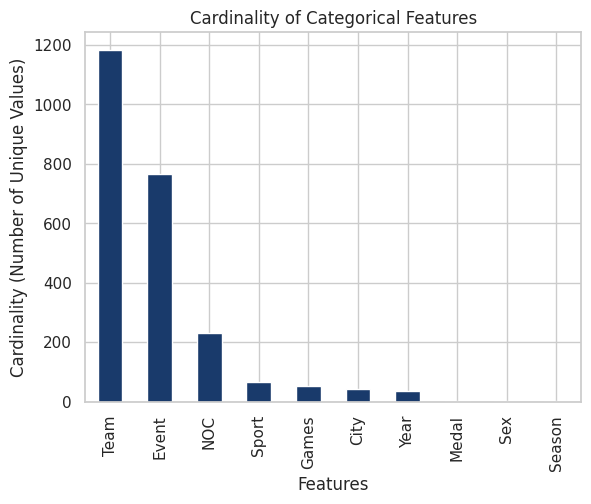

In [197]:
# Filter categorical columns to exclude 'ID' and 'Name'
categorical_cols_filtered = [var for var in categorical_cols if var not in ['ID', 'Name']]

# Calculate cardinality (number of unique values) for each categorical feature
# and sort in descending order
cardinality = data[categorical_cols_filtered].nunique().sort_values(ascending=False)
print(cardinality)

# Plot bar chart of categorical features vs their cardinality

cardinality.plot.bar(color='#193a6b')
plt.title('Cardinality of Categorical Features')
plt.xlabel('Features')
plt.ylabel('Cardinality (Number of Unique Values)')
plt.show()


Based on this chart, the key discovery is the extreme variation in uniqueness, or cardinality, across the different categorical features in the dataset. The 'Team' feature has by far the highest cardinality, indicating it has the most unique values (over 1000) and is likely the least repetitive field. This is followed by 'Event' and 'NOC' (National Olympic Committee), suggesting a wide diversity of events and competing nations. In contrast, features like 'Medal', 'Sex', and 'Season' have very low cardinality, confirming they contain only a few distinct, repeating values (e.g., Gold/Silver/Bronze, Male/Female, Summer/Winter). This highlights that the dataset is composed of a large number of unique teams participating in a wide variety of events, all classified under a small set of simple, standardized categories.

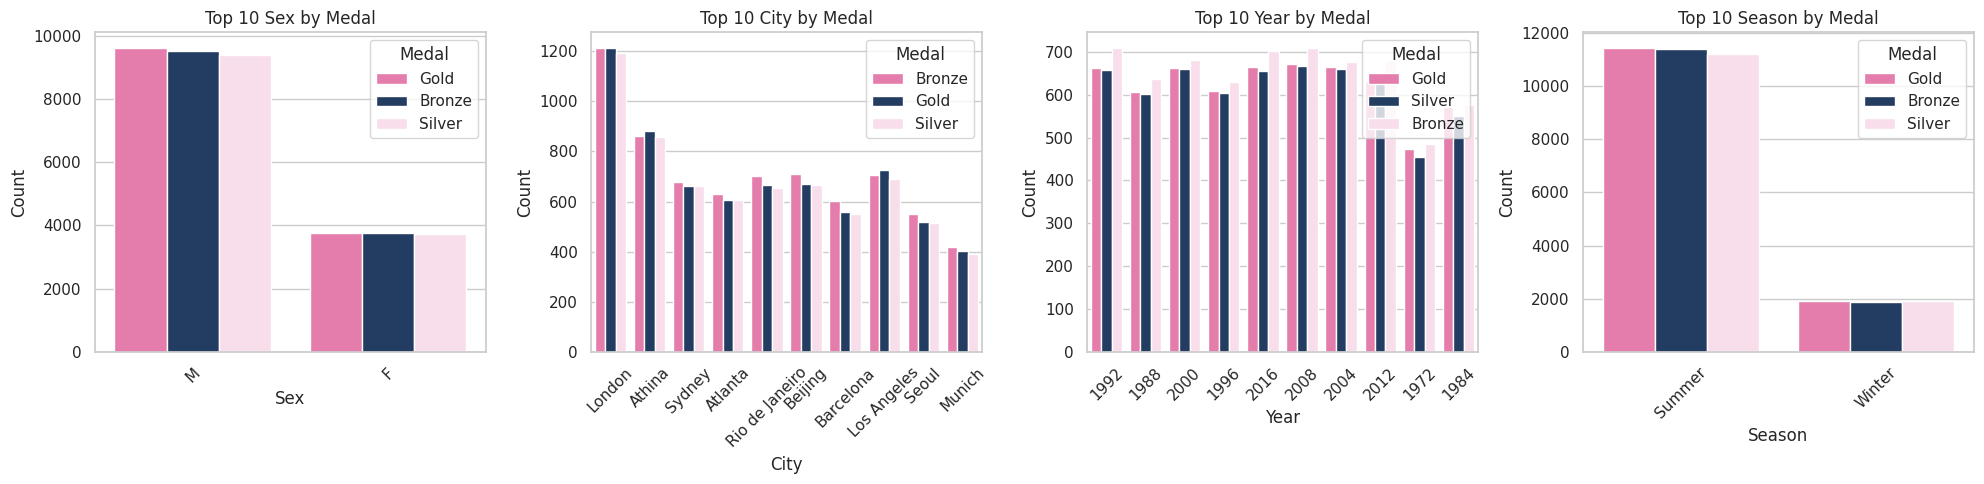

In [198]:


# Columns of interest
categorical_cols_filtered = ['Sex', 'City', 'Year', 'Season']

# Set pastel color palette

sns.set_palette(hex_color )

# Create subplots
fig, axes = plt.subplots(1, len(categorical_cols_filtered), figsize=(20, 5))  # side by side

for ax, var in zip(axes, categorical_cols_filtered):
    # Get top 10 categories overall
    top_categories = data[var].value_counts().nlargest(10).index
    filtered_data_top10 = data[data[var].isin(top_categories)]

    # Plot with hue for Medal
    sns.countplot(data=filtered_data_top10, x=var, hue='Medal', order=top_categories, ax=ax)

    ax.set_xlabel(var)
    ax.set_ylabel('Count')
    ax.set_title(f'Top 10 {var} by Medal')
    ax.tick_params(axis='x', rotation=45)

# Adjust layout so labels don't overlap
plt.tight_layout()
plt.show()




Based on these four visualizations, the key discovery is a significant historical and demographic dominance: male athletes have won the vast majority of medals, vastly outnumbering female winners across all medal types. This disparity is reflected geographically and over time, with the top host cities and years showing similar distributions where gold, silver, and bronze medals are awarded in roughly comparable proportions. Furthermore, the "Season" chart confirms that the Summer Olympics are a much larger event than the Winter Olympics, accounting for a substantially higher total number of medals awarded. The charts collectively highlight a historical male dominance in the Olympics, the consistent ratio of medal types awarded at major events, and the greater scale of the Summer Games.

**What is the distribution of athletes over the years, separated by Summer and Winter Olympics?**

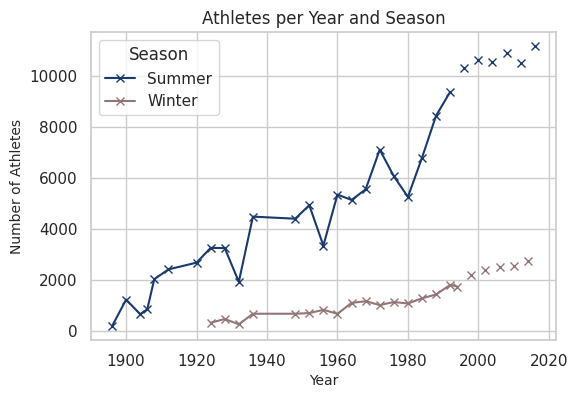

In [199]:
# Ensure Year is integer
data['Year'] = data['Year'].astype(int)

# Number of unique athletes per Year and Season
athletes_per_year_season = data.groupby(['Year','Season'])['ID'].nunique().unstack()

# Set style
sns.set(style="whitegrid")

colors = [my_cmap(0.0), my_cmap(0.5)]  # e.g., first color for Summer, second for Winter

# Plot line chart with custom colors
athletes_per_year_season.plot(
    kind='line',
    marker='x',
    figsize=(6,4),
    color=colors
)

plt.title('Athletes per Year and Season')
plt.xlabel('Year', fontsize=10)
plt.ylabel('Number of Athletes', fontsize=10)
plt.show()

Based on the chart, the key discovery is the massive and consistent growth in the number of athletes participating in the Summer Olympics over time, far surpassing the scale of the Winter Games. Starting from a relatively small number of participants around 1900, the Summer Olympics have experienced a steep upward trajectory, particularly post-1960, highlighting the event's expansion into a truly global phenomenon. In contrast, the Winter Olympics maintain a significantly smaller but stable number of athletes throughout its history. The chart clearly illustrates the overwhelming dominance of the Summer Olympics in terms of participant size and demonstrates a major trend of increasing inclusivity and global participation in the Games over the past century.

# **Find the relations between columns**

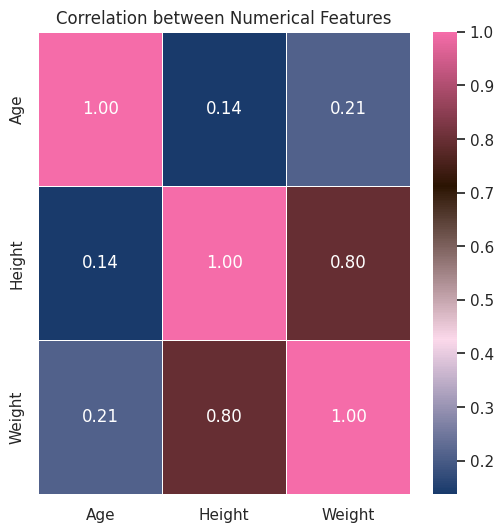

In [200]:
# Calculate correlation matrix for only the numerical columns
correlation_matrix = data[numerical_cols].corr()

# Set figure size
plt.figure(figsize=(6, 6))

# Plot heatmap of correlation matrix
sns.heatmap(
    correlation_matrix,   # data to visualize
    annot=True,           # show correlation values inside the cells
    cmap= my_cmap,          # color palette (cool tones: purple → blue → cyan)
    fmt='.2f',            # format numbers to 2 decimal places
    linewidths=0.5        # thin lines between cells for clarity
)

# Add a title
plt.title('Correlation between Numerical Features')

# Show the plot
plt.show()






Based on this correlation matrix, the key discovery is the strong positive relationship between an athlete's height and weight, which is an expected and logical physiological association. In contrast, an athlete's age shows very weak, near-zero correlation with both height and weight. This indicates that within this dataset of athletes, these physical attributes are not meaningfully associated with how old an athlete is. The findings suggest that while height and weight are closely related traits, age is an independent factor that does not predict an athlete's physical build.

# **Label encoding for season ,sex & medal**

Correlation matrix between Sex, Age, Year, Season, Won_Medal, and Number of Athletes:
                Sex_encoded       Age      Year  Season_encoded  Won_Medal  \
Sex_encoded        1.000000 -0.179324  0.289882        0.037277   0.007420   
Age               -0.179324  1.000000 -0.115137       -0.038521   0.024126   
Year               0.289882 -0.115137  1.000000        0.147697  -0.061552   
Season_encoded     0.037277 -0.038521  0.147697        1.000000  -0.038905   
Won_Medal          0.007420  0.024126 -0.061552       -0.038905   1.000000   
Num_Athletes       0.198387 -0.047173  0.645114       -0.605418  -0.017988   

                Num_Athletes  
Sex_encoded         0.198387  
Age                -0.047173  
Year                0.645114  
Season_encoded     -0.605418  
Won_Medal          -0.017988  
Num_Athletes        1.000000  


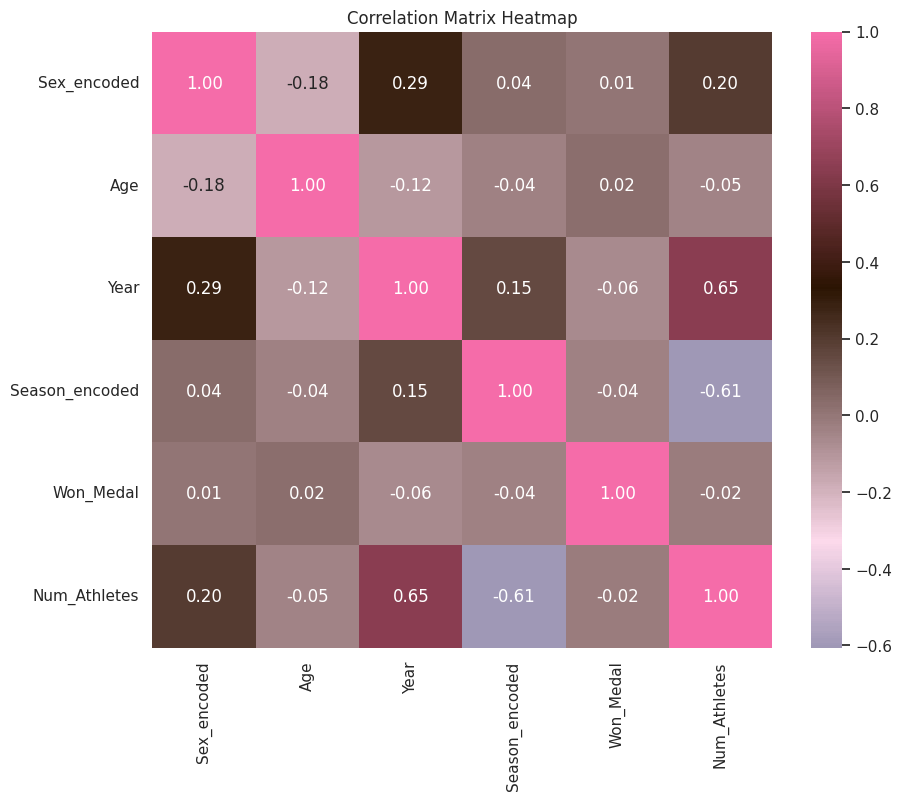

In [201]:
# ------------------------------
# Encode categorical variables, compute Num_Athletes, and correlation matrix
# ------------------------------

# 1. Encode 'Sex' column: 'M' → 0, 'F' → 1
data['Sex_encoded'] = data['Sex'].map({'M': 0, 'F': 1})

# 2. Encode 'Season' column: 'Summer' → 0, 'Winter' → 1
data['Season_encoded'] = data['Season'].map({'Summer': 0, 'Winter': 1})

# 3. CREATE BINARY TARGET: 1 if athlete won any medal, 0 otherwise
data['Won_Medal'] = data['Medal'].notna().astype(int)

# 4. Compute number of unique athletes per Year and Season
athletes_grouped = data.groupby(['Year', 'Season_encoded'])['ID'].nunique().reset_index(name='Num_Athletes')

# 5. Merge Num_Athletes back to the main dataset
data = pd.merge(data, athletes_grouped, on=['Year', 'Season_encoded'], how='left')

# 6. Select relevant columns for correlation - NOW WITH Won_Medal INSTEAD OF Medal_encoded
cols_to_correlate = ['Sex_encoded', 'Age', 'Year', 'Season_encoded', 'Won_Medal', 'Num_Athletes']

# 7. Compute correlation matrix
correlation_matrix = data[cols_to_correlate].corr()

# 8. Display correlation matrix
print("Correlation matrix between Sex, Age, Year, Season, Won_Medal, and Number of Athletes:")
print(correlation_matrix)

# 9. Draw heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=my_cmap, center=0, fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

 The most significant discovery is that the simple fact of **winning a medal (`Won_Medal`) shows virtually no linear correlation with any of the other measured factors**, including sex, age, year, season, or the number of athletes at the games. All correlations with the `Won_Medal` variable are extremely weak (between -0.06 and 0.02), indicating that these specific variables are poor predictors of Olympic success on their own. The strongest relationships remain logistical: the powerful link between `Year` and the `Number of Athletes` (0.65) confirms the Games' growth, and the strong negative correlation between `Season` (Winter) and `Num_Athletes` (-0.61) reinforces the smaller scale of the Winter Olympics. The moderate correlation between `Sex_encoded` (Female) and `Year` (0.29) also remains, highlighting the trend of increasing female participation over time. Ultimately, this suggests that winning an Olympic medal is not determined by these broad demographic or temporal variables but is likely influenced by a more complex combination of factors like individual skill, specific event, country, and training.

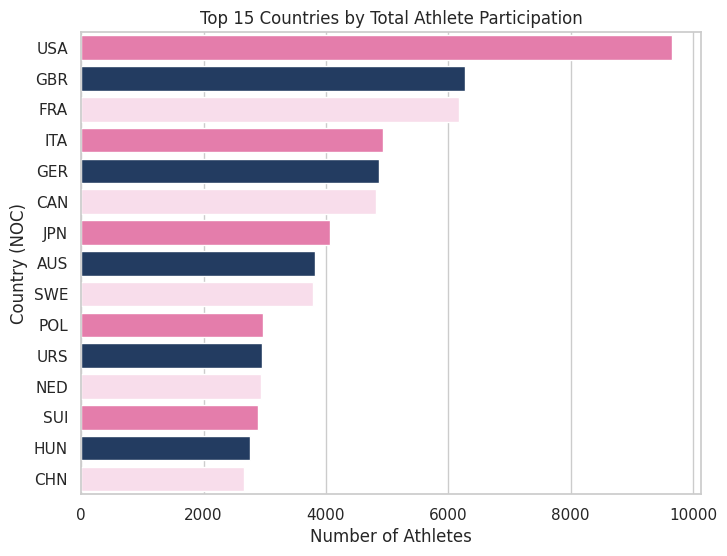

In [202]:
#Bar chart → Top 15 countries by participation.
country_participation = (
    data.groupby("NOC")["ID"]
    .nunique()
    .reset_index(name="Num_Athletes")
    .sort_values(by="Num_Athletes", ascending=False)
    .head(15)
)

plt.figure(figsize=(8,6))
sns.barplot(data=country_participation, x="Num_Athletes", y="NOC",palette=hex_color)
plt.title("Top 15 Countries by Total Athlete Participation")
plt.xlabel("Number of Athletes")
plt.ylabel("Country (NOC)")
plt.show()


Based on this chart, the most significant discovery is the overwhelming dominance of the United States (USA) in terms of total athlete participation, far exceeding all other nations. The USA has sent nearly twice as many athletes as the next closest country (Great Britain/GBR), highlighting its long-standing commitment and large-scale investment in Olympic sports. The top 15 is composed predominantly of wealthy, Western nations with strong historical ties to the Olympic movement, including major European powers like France, Italy, and Germany. The presence of the Soviet Union (URS) and China (CHN) on the list also underscores the importance placed on the Olympics by major geopolitical actors for international prestige. This chart effectively visualizes the correlation between a country's economic resources, population size, and its level of participation in the Olympic Games.

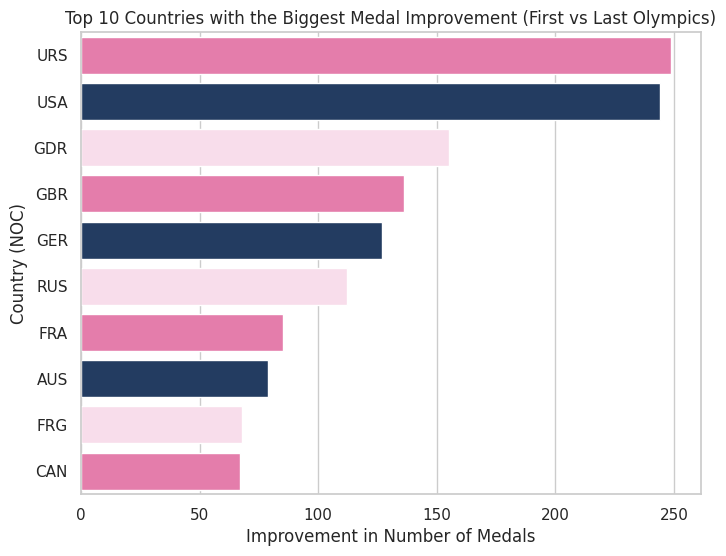

In [203]:
# Keep only medal winners
medals = data.dropna(subset=["Medal"])

# --- 1. Medal count per country and year ---
medals_by_country_year = (
    medals.groupby(["Year", "NOC"])["Medal"]
    .count()
    .reset_index(name="Num_Medals")
)

# --- 2. Calculate improvement (difference between last and first recorded year) ---
country_improvement = (
    medals_by_country_year.groupby("NOC")
    .agg(first_year=("Year", "min"),
         last_year=("Year", "max"),
         first_medals=("Num_Medals", "first"),
         last_medals=("Num_Medals", "last"))
    .reset_index()
)

country_improvement["Improvement"] = (
    country_improvement["last_medals"] - country_improvement["first_medals"]
)

# Sort by most improved
top_improvers = country_improvement.sort_values(
    by="Improvement", ascending=False
).head(10)

# --- 3. Plot ---
plt.figure(figsize=(8,6))
sns.barplot(data=top_improvers, x="Improvement", y="NOC", palette=hex_color)
plt.title("Top 10 Countries with the Biggest Medal Improvement (First vs Last Olympics)")
plt.xlabel("Improvement in Number of Medals")
plt.ylabel("Country (NOC)")
plt.show()


Based on this chart, the key discovery is the dramatic and politically charged nature of Olympic success, with the Soviet Union (URS) and East Germany (GDR) showing the most significant improvement in medal counts between their first and last Olympic appearances. This remarkable improvement strongly suggests these nations implemented state-sponsored, systematic athletic programs focused explicitly on Olympic success, likely for ideological reasons during the Cold War. The presence of both divided and unified German states (GDR, FRG, and GER) on the same list further highlights how political history is directly reflected in Olympic performance. The chart reveals that the most impressive gains in Olympic achievement are not just about athletic prowess but are often deeply intertwined with national political projects and investment in elite sports systems.

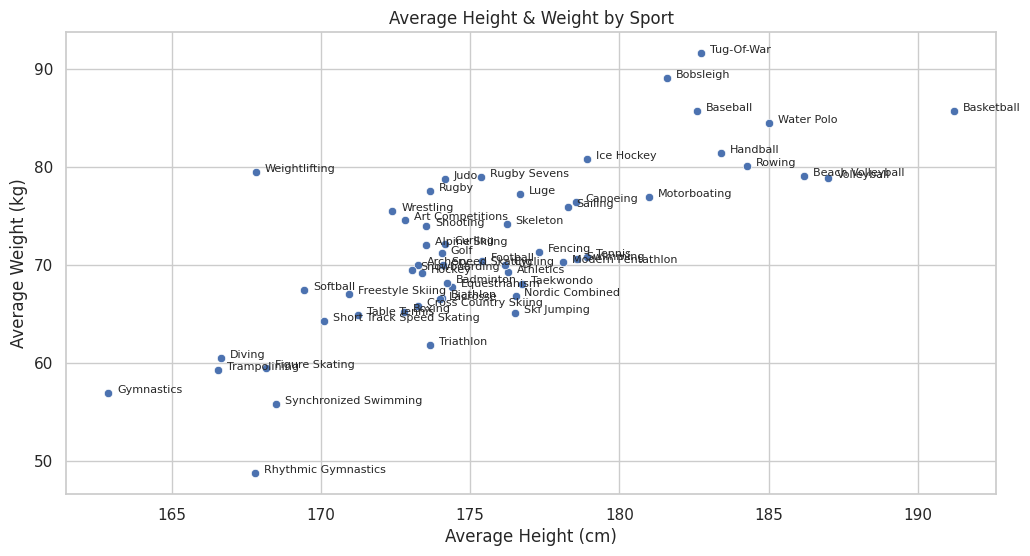

In [204]:
# Average body measurements per sport
body_by_sport = (
    data.dropna(subset=["Height","Weight"])
    .groupby("Sport")[["Height","Weight"]]
    .mean()
    .reset_index()
    .sort_values(by="Height", ascending=False)
)

plt.figure(figsize=(12,6))
sns.scatterplot(data=body_by_sport, x="Height", y="Weight")
for i, row in body_by_sport.iterrows():
    plt.text(row["Height"]+0.3, row["Weight"], row["Sport"], fontsize=8)
plt.title("Average Height & Weight by Sport")
plt.xlabel("Average Height (cm)")
plt.ylabel("Average Weight (kg)")
plt.show()


This chart, "Average Height & Weight by Sport," provides a comprehensive overview of the physical profiles of Olympic athletes across various sports. It reveals that basketball players are the tallest and heaviest, while gymnastics athletes are the shortest and lightest. Sports like weightlifting and rugby feature athletes with high body mass and muscle density, while sports like volleyball and rowing emphasize height but maintain a lighter weight. The majority of Olympic sports cluster within the middle range of height (170-180 cm) and weight (60-75 kg), reflecting a balance of power, speed, and endurance.

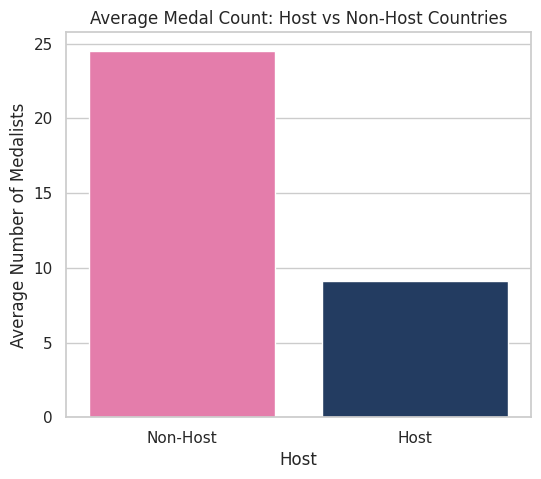

In [205]:
#Host Country Effect (Do Hosts Win More Medals?)

# Extract host countries (by NOC) per year
hosts = data.groupby(["Year","City","NOC"])["ID"].count().reset_index()
hosts_per_year = hosts.groupby("Year")["NOC"].first().reset_index(name="Host_NOC")

# Merge host info into medal data
medals_by_country_year = (
    data.dropna(subset=["Medal"])
    .groupby(["Year","NOC"])["ID"]
    .nunique()
    .reset_index(name="Num_Medalists")
)

medals_with_host = medals_by_country_year.merge(hosts_per_year, on="Year", how="left")
medals_with_host["Host"] = medals_with_host["NOC"] == medals_with_host["Host_NOC"]

# Compare medal counts: host vs non-host
host_effect = medals_with_host.groupby("Host")["Num_Medalists"].mean().reset_index()

plt.figure(figsize=(6,5))
sns.barplot(data=host_effect, x="Host", y="Num_Medalists", palette=hex_color)
plt.title("Average Medal Count: Host vs Non-Host Countries")
plt.xticks([0,1], ["Non-Host", "Host"])
plt.ylabel("Average Number of Medalists")
plt.show()


The chart compares the average number of medals won by host countries and non-host countries in the Olympics. The chart shows that **non-host countries** typically win an **average of 20+ medals**, while **host countries** win an **average of around 10 medals**.

This suggests that being a host country may not necessarily lead to a significantly higher average medal count, despite the potential home advantage, like better facilities or local support. However, the chart may also indicate that other factors, such as athlete preparation, resources, and historical performance, play a stronger role in overall medal tally than the mere hosting of the event.